# Zero-Shot Learning with Transformers

In [1]:

# Now import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset
import time
import warnings
import os
from tqdm.auto import tqdm

# For transformers library
from transformers import (
    AutoModelForSequenceClassification, 
    AutoTokenizer, 
    AutoModelForQuestionAnswering,
    AutoModelForTokenClassification,
    AutoModelForMaskedLM,
    AutoModelForCausalLM,  # For generative models like Qwen
    AutoModelForSeq2SeqLM,
    pipeline,
    set_seed
)

In [2]:

# Set environment variables to control warning messages
os.environ["TOKENIZERS_PARALLELISM"] = "false"
warnings.filterwarnings("ignore")

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seed for reproducibility
set_seed(42)

Using device: cpu


# Part 1: Introduction to Transformers Library and Hugging Face

# 1. Introduction to Transformers and Hugging Face

The Hugging Face Transformers library provides thousands of pre-trained models for various 
Natural Language Processing (NLP) tasks. These models can be used for tasks they were specifically 
trained on, but also for zero-shot learning - where they can perform tasks they weren't explicitly trained for.

Key advantages of using Hugging Face Transformers:
- Access to state-of-the-art models
- Simple, unified API for different model architectures
- Easy fine-tuning on custom tasks
- Active community and regular updates
- Integration with popular frameworks like PyTorch and TensorFlow


# 2. What is Zero-Shot Learning?

Zero-shot learning refers to a machine learning approach where a model can make predictions for classes 
it has never seen during training. In the context of NLP:

- Traditional approach: Train a model on labeled examples of exactly the categories you want to predict
- Zero-shot approach: Use a pre-trained model to classify text into arbitrary categories without specific training

For example, a zero-shot classifier could classify text as "sports," "politics," or "technology" without ever 
being explicitly trained on these categories.

This capability comes from models that have learned general semantic relationships during pre-training on 
vast amounts of text data.


# 3. Overview of Available Models

Hugging Face hosts thousands of models with different:
- Sizes (from tiny to massive)
- Architectures (BERT, RoBERTa, T5, BART, GPT, etc.)
- Languages (multilingual or language-specific)
- Specializations (general or domain-specific)

For resource-constrained environments, several efficient models under 1.5B parameters are available:
- DistilBERT (~66M parameters) - Distilled version of BERT
- ALBERT (~12M parameters) - A Lite BERT with parameter sharing
- MobileBERT (~25M parameters) - A compact BERT designed for mobile devices
- BART-base (~140M parameters) - Bidirectional and Auto-Regressive Transformer
- T5-small (~60M parameters) - Text-to-Text Transfer Transformer
- DeBERTa-v3-small (~44M parameters) - Improved BERT with disentangled attention

# Part 2: Zero-Shot Learning

# Zero-Shot Classification

Loading zero-shot classification model...


Device set to use cpu



Performing zero-shot classification...

Zero-Shot Classification Results:

Text: The stock market fell by 10% today due to economic concerns.
  - finance: 0.8520
  - health: 0.0302
  - technology: 0.0234
  - science: 0.0231
  - entertainment: 0.0226
  - sports: 0.0199
  - politics: 0.0145
  - education: 0.0144

Text: Scientists discover a new species of deep-sea fish that can glow in the dark.
  - science: 0.8892
  - technology: 0.0478
  - health: 0.0229
  - entertainment: 0.0228
  - education: 0.0060
  - sports: 0.0054
  - finance: 0.0034
  - politics: 0.0024

Text: The latest smartphone from Apple features a revolutionary camera system.
  - technology: 0.9379
  - entertainment: 0.0176
  - science: 0.0149
  - health: 0.0088
  - sports: 0.0085
  - finance: 0.0057
  - education: 0.0038
  - politics: 0.0029

Text: The team scored in the final minute to win the championship.
  - sports: 0.8365
  - technology: 0.0528
  - entertainment: 0.0365
  - finance: 0.0203
  - health: 0.0181
  - sci

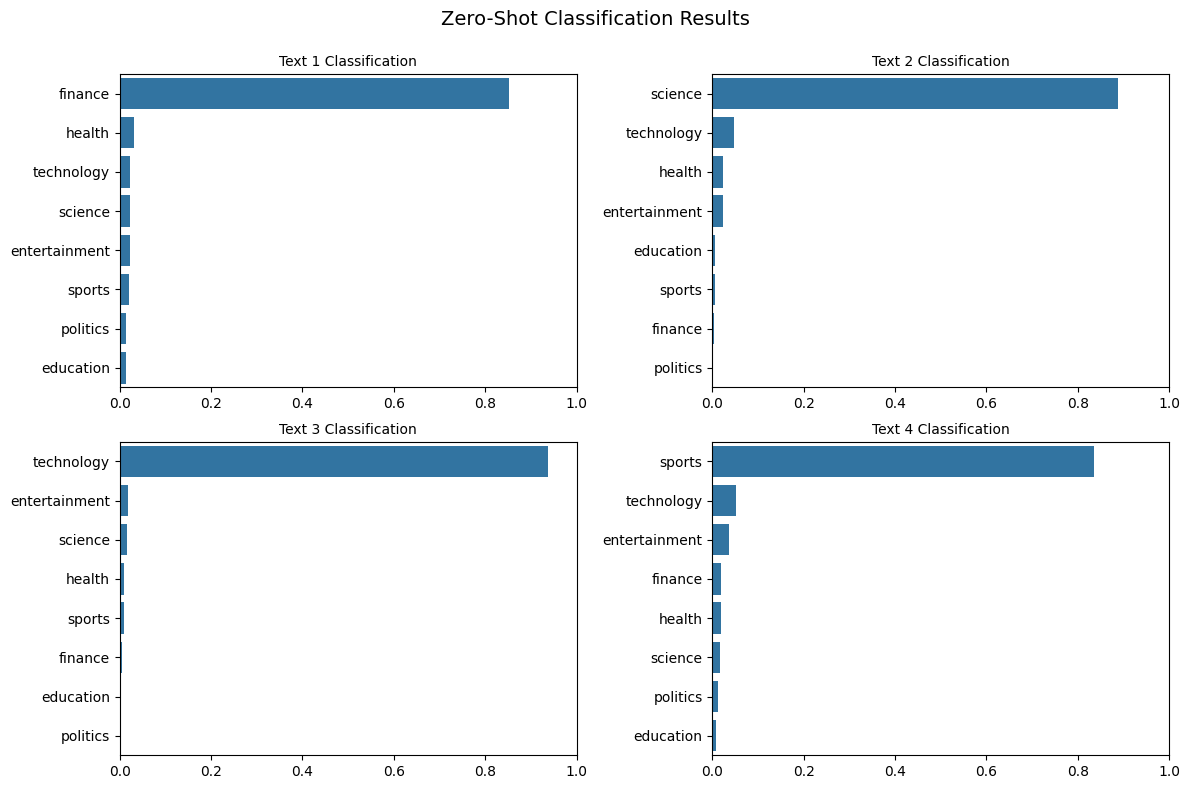

In [4]:
# Load zero-shot classification pipeline
print("Loading zero-shot classification model...")
classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",  # ~400M parameters
    device=0 if torch.cuda.is_available() else -1
)

# Example texts
texts = [
    "The stock market fell by 10% today due to economic concerns.",
    "Scientists discover a new species of deep-sea fish that can glow in the dark.",
    "The latest smartphone from Apple features a revolutionary camera system.",
    "The team scored in the final minute to win the championship."
]

# Define potential categories
candidate_labels = [
    "finance", "science", "technology", "sports", 
    "politics", "entertainment", "health", "education"
]

# Run zero-shot classification
print("\nPerforming zero-shot classification...")
results = []
for text in texts:
    result = classifier(text, candidate_labels)
    results.append(result)

# Display results
print("\nZero-Shot Classification Results:")
for i, result in enumerate(results):
    print(f"\nText: {texts[i]}")
    for label, score in zip(result['labels'], result['scores']):
        print(f"  - {label}: {score:.4f}")

# Visualize results
plt.figure(figsize=(12, 8))
for i, result in enumerate(results):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=result['scores'], y=result['labels'])
    plt.title(f"Text {i+1} Classification", fontsize=10)
    plt.xlim(0, 1)
    plt.tight_layout()
plt.suptitle("Zero-Shot Classification Results", fontsize=14)
plt.subplots_adjust(top=0.9)
plt.savefig('zero_shot_classification.png')
plt.show()

In [5]:
# Multi-label classification
print("\nMulti-label Zero-Shot Classification:")
multi_label_result = classifier(
    "This movie had amazing visuals but the plot was boring and predictable.",
    candidate_labels=["visuals", "plot", "acting", "soundtrack"],
    multi_label=True
)
print(f"Text: This movie had amazing visuals but the plot was boring and predictable.")
for label, score in zip(multi_label_result['labels'], multi_label_result['scores']):
    print(f"  - {label}: {score:.4f}")


Multi-label Zero-Shot Classification:
Text: This movie had amazing visuals but the plot was boring and predictable.
  - visuals: 0.9841
  - plot: 0.7766
  - acting: 0.0015
  - soundtrack: 0.0004


# Zero-Shot Question Answering

Device set to use cpu



# 5. Zero-Shot Question Answering
Loading question answering model...

Performing zero-shot question answering...

Question Answering Results:

Context 1:
Q: How many square kilometers does the Amazon rainforest cover?
A: 5,500,000 (confidence: 0.6708)

Q: Which continents have Amazon rainforest?
A: nine (confidence: 0.7622)

Q: How many nations have territory in the Amazon basin?
A: nine (confidence: 0.8987)


Context 2:
Q: What type of programming language is Python?
A: high-level, interpreted, general-purpose (confidence: 0.5356)

Q: What does Python's design philosophy emphasize?
A: code readability (confidence: 0.6276)

Q: What programming paradigms does Python support?
A: structured, 
    object-oriented and functional programming (confidence: 0.4958)



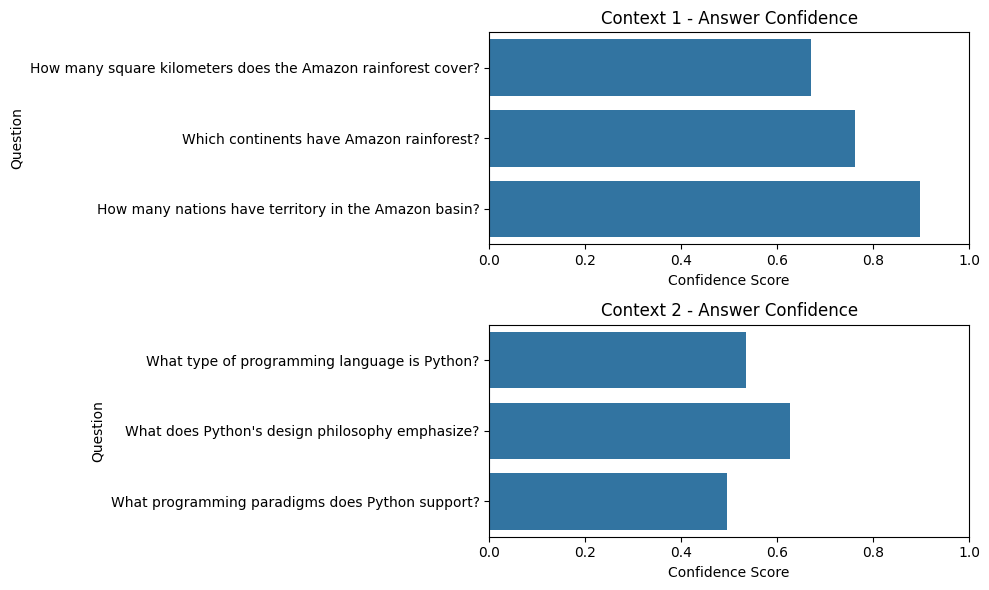


Highlighted Answers in Context:
Question: How many square kilometers does the Amazon rainforest cover?
Highlighted Context: 
    The Amazon rainforest, also called Amazon jungle or Amazonia, is a moist broadleaf 
    tropica...    territory belonging to nine nations and 3,344 formally acknowledged indigenous territories.
    

Question: Which continents have Amazon rainforest?
Highlighted Context: 
    The Amazon rainforest, also called Amazon jungle or Amazonia, is a moist broadleaf 
    tropica...territory belonging to **nine** nations and 3,344 formally acknowledged indigenous territories.
    

Question: How many nations have territory in the Amazon basin?
Highlighted Context: 
    The Amazon rainforest, also called Amazon jungle or Amazonia, is a moist broadleaf 
    tropica...territory belonging to **nine** nations and 3,344 formally acknowledged indigenous territories.
    

Question: What type of programming language is Python?
Highlighted Context: 
    Python is a **high-leve

In [6]:
print("\n# 5. Zero-Shot Question Answering")
print("Loading question answering model...")

qa_pipeline = pipeline(
    "question-answering",
    model="distilbert-base-cased-distilled-squad",  # ~65M parameters
    device=0 if torch.cuda.is_available() else -1
)

# Example contexts and questions
contexts = [
    """
    The Amazon rainforest, also called Amazon jungle or Amazonia, is a moist broadleaf 
    tropical rainforest in the Amazon biome that covers most of the Amazon basin of South America. 
    This basin encompasses 7,000,000 square kilometers (2,700,000 sq mi), of which 5,500,000 
    square kilometers (2,100,000 sq mi) are covered by the rainforest. This region includes 
    territory belonging to nine nations and 3,344 formally acknowledged indigenous territories.
    """,
    
    """
    Python is a high-level, interpreted, general-purpose programming language. Its design philosophy 
    emphasizes code readability with the use of significant indentation. Python is dynamically-typed 
    and garbage-collected. It supports multiple programming paradigms, including structured, 
    object-oriented and functional programming. It is often described as a "batteries included" 
    language due to its comprehensive standard library.
    """
]

questions = [
    ["How many square kilometers does the Amazon rainforest cover?", 
     "Which continents have Amazon rainforest?", 
     "How many nations have territory in the Amazon basin?"],
     
    ["What type of programming language is Python?", 
     "What does Python's design philosophy emphasize?", 
     "What programming paradigms does Python support?"]
]

# Run question answering
print("\nPerforming zero-shot question answering...")
qa_results = []

for i, context in enumerate(contexts):
    context_results = []
    for question in questions[i]:
        result = qa_pipeline(question=question, context=context)
        context_results.append({
            'question': question,
            'answer': result['answer'],
            'score': result['score'],
            'start': result['start'],
            'end': result['end']
        })
    qa_results.append(context_results)

# Display results
print("\nQuestion Answering Results:")
for i, context_results in enumerate(qa_results):
    print(f"\nContext {i+1}:")
    for result in context_results:
        print(f"Q: {result['question']}")
        print(f"A: {result['answer']} (confidence: {result['score']:.4f})")
        print()

# Function to visualize answer confidence
def plot_qa_confidence(qa_results):
    fig, axes = plt.subplots(len(qa_results), 1, figsize=(10, 3*len(qa_results)))
    
    if len(qa_results) == 1:
        axes = [axes]
        
    for i, context_results in enumerate(qa_results):
        questions = [r['question'] for r in context_results]
        scores = [r['score'] for r in context_results]
        
        sns.barplot(x=scores, y=questions, ax=axes[i])
        axes[i].set_xlim(0, 1)
        axes[i].set_title(f"Context {i+1} - Answer Confidence")
        axes[i].set_xlabel("Confidence Score")
        axes[i].set_ylabel("Question")
    
    plt.tight_layout()
    plt.savefig('qa_confidence.png')
    plt.show()

plot_qa_confidence(qa_results)

# Highlight answers in context
def highlight_answer(context, start, end):
    return context[:start] + "**" + context[start:end] + "**" + context[end:]

print("\nHighlighted Answers in Context:")
for i, context in enumerate(contexts):
    for result in qa_results[i]:
        highlighted = highlight_answer(context, result['start'], result['end'])
        print(f"Question: {result['question']}")
        print(f"Highlighted Context: {highlighted[:100]}...{highlighted[-100:]}")
        print()


# Zero-Shot Sentiment Analysis


# 6. Zero-Shot Sentiment Analysis
Loading sentiment analysis model...


Device set to use cpu



Performing sentiment analysis...

Sentiment Analysis Results:
Text: I absolutely loved this product! It exceeded all my expectations.
Sentiment: POSITIVE, Score: 0.9999

Text: The service was okay, but could have been better.
Sentiment: NEGATIVE, Score: 0.9894

Text: This is the worst experience I've ever had. I want my money back.
Sentiment: NEGATIVE, Score: 0.9998

Text: The food was delicious, but the waiting time was too long.
Sentiment: NEGATIVE, Score: 0.9939

Text: I'm not sure if I would recommend this to others.
Sentiment: NEGATIVE, Score: 0.9946



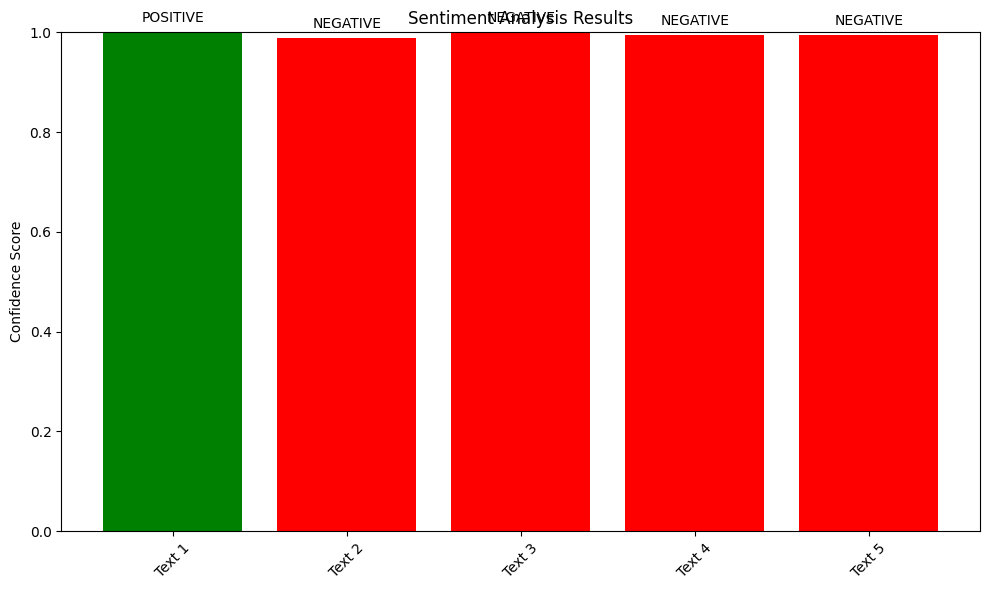

In [7]:
print("\n# 6. Zero-Shot Sentiment Analysis")
print("Loading sentiment analysis model...")

sentiment_classifier = pipeline(
    "text-classification",
    model="distilbert-base-uncased-finetuned-sst-2-english",  # ~66M parameters
    device=0 if torch.cuda.is_available() else -1
)

# Example texts for sentiment analysis
sentiment_texts = [
    "I absolutely loved this product! It exceeded all my expectations.",
    "The service was okay, but could have been better.",
    "This is the worst experience I've ever had. I want my money back.",
    "The food was delicious, but the waiting time was too long.",
    "I'm not sure if I would recommend this to others."
]

# Perform sentiment analysis
print("\nPerforming sentiment analysis...")
sentiment_results = sentiment_classifier(sentiment_texts)

# Display results
print("\nSentiment Analysis Results:")
for text, result in zip(sentiment_texts, sentiment_results):
    print(f"Text: {text}")
    print(f"Sentiment: {result['label']}, Score: {result['score']:.4f}")
    print()

# Visualize sentiment results
plt.figure(figsize=(10, 6))
labels = [r['label'] for r in sentiment_results]
scores = [r['score'] for r in sentiment_results]
colors = ['green' if l == 'POSITIVE' else 'red' for l in labels]

plt.bar(range(len(sentiment_texts)), scores, color=colors)
plt.xticks(range(len(sentiment_texts)), [f"Text {i+1}" for i in range(len(sentiment_texts))], rotation=45)
plt.ylabel('Confidence Score')
plt.title('Sentiment Analysis Results')
plt.ylim(0, 1)

# Add text labels above bars
for i, (label, score) in enumerate(zip(labels, scores)):
    plt.text(i, score + 0.02, label, ha='center')

plt.tight_layout()
plt.savefig('sentiment_analysis.png')
plt.show()

# Zero-Shot Translation

In [13]:

print("\n# 8. Zero-Shot Translation")
print("Loading translation model...")

translation_model = pipeline(
    "translation",
    model="Helsinki-NLP/opus-mt-en-fr",  # ~77M parameters
    device=0 if torch.cuda.is_available() else -1
)

# Example texts for translation
translation_texts = [
    "Hello, how are you today?",
    "Artificial intelligence is transforming the world.",
    "I love to learn new programming languages."
]

# Perform translation
print("\nPerforming English to French translation...")
translation_results = translation_model(translation_texts)

# Display results
print("\nTranslation Results (English → French):")
for text, result in zip(translation_texts, translation_results):
    print(f"English: {text}")
    print(f"French: {result['translation_text']}")
    print()


# 8. Zero-Shot Translation
Loading translation model...


Device set to use cpu



Performing English to French translation...

Translation Results (English → French):
English: Hello, how are you today?
French: Bonjour, comment allez-vous aujourd'hui ?

English: Artificial intelligence is transforming the world.
French: L'intelligence artificielle transforme le monde.

English: I love to learn new programming languages.
French: J'adore apprendre de nouveaux langages de programmation.



# Zero-Shot Text Summarization

In [9]:

print("\n# 9. Zero-Shot Text Summarization")
print("Loading summarization model...")

summarizer = pipeline(
    "summarization",
    model="sshleifer/distilbart-cnn-6-6",  # ~306M parameters
    device=0 if torch.cuda.is_available() else -1
)

# Example long texts for summarization
summarization_texts = [
    """
    Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to natural 
    intelligence displayed by animals including humans. AI research has been defined as the field of 
    study of intelligent agents, which refers to any system that perceives its environment and takes 
    actions that maximize its chance of achieving its goals.
    
    The term "artificial intelligence" had previously been used to describe machines that mimic and 
    display "human" cognitive skills that are associated with the human mind, such as "learning" and 
    "problem-solving". This definition has since been rejected by major AI researchers who now describe 
    AI in terms of rationality and acting rationally, which does not limit how intelligence can be 
    articulated.
    
    AI applications include advanced web search engines, recommendation systems, understanding human 
    speech, self-driving cars, automated decision-making and competing at the highest level in strategic 
    game systems. As machines become increasingly capable, tasks considered to require "intelligence" 
    are often removed from the definition of AI, a phenomenon known as the AI effect.
    """
]

# Perform summarization
print("\nPerforming text summarization...")
summarization_results = summarizer(
    summarization_texts,
    max_length=100,
    min_length=30,
    do_sample=False
)

# Display results
print("\nSummarization Results:")
for i, (text, result) in enumerate(zip(summarization_texts, summarization_results)):
    print(f"\nOriginal Text ({len(text.split())} words):")
    print(f"{text[:200]}...")
    print(f"\nSummary ({len(result['summary_text'].split())} words):")
    print(result['summary_text'])


# 9. Zero-Shot Text Summarization
Loading summarization model...


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/460M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/460M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu



Performing text summarization...

Summarization Results:

Original Text (162 words):

    Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to natural 
    intelligence displayed by animals including humans. AI research has been defined as the field of ...

Summary (46 words):
 AI research has been defined as the field of study of intelligent agents . The term "artificial intelligence" had previously been used to describe machines that mimic and display "human" cognitive skills . This definition has since been rejected by major AI researchers who now describe  


### Zero-Shot Mathematical Reasoning with Specialized Models

In [10]:
try:
    # Try to load the specialized math model
    math_tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-Math-1.5B")
    math_model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2.5-Math-1.5B", device_map="auto")
    
    # Helper function for math problem solving
    def solve_math_problem(problem, max_length=1024):
        """Solve math problems using the specialized model"""
        # Format the input prompt
        prompt = f"Solve the following math problem step by step:\n{problem}\n\nSolution:"
        
        # Tokenize the input
        inputs = math_tokenizer(prompt, return_tensors="pt").to(math_model.device)
        
        # Generate the solution
        with torch.no_grad():
            outputs = math_model.generate(
                inputs.input_ids,
                max_length=max_length,
                temperature=0.1,
                do_sample=False
            )
        
        # Decode and return the solution
        solution = math_tokenizer.decode(outputs[0], skip_special_tokens=True)
        
        # Extract just the solution part
        solution = solution.replace(prompt, "")
        return solution
    
    # Example math problems of varying difficulty
    math_problems = [
        "If a rectangle has a length of 12 cm and a width of 8 cm, what is its area?",
        
        "Solve the quadratic equation: 2x² - 7x + 3 = 0",
        
        "A ball is thrown upward from a height of 2 meters with an initial velocity of 15 m/s. The height h of the ball after t seconds is given by the equation h = 2 + 15t - 4.9t². When does the ball hit the ground?",
        
        "Find the derivative of f(x) = 3x⁴ - 2x² + 5x - 7",
        
        """In a game, you roll two fair 6-sided dice. 
        What is the probability that the sum of the dice is at least 10?"""
    ]
    
    # Solve each problem
    print("\nSolving math problems with Qwen2.5-Math-1.5B model...")
    for i, problem in enumerate(math_problems):
        print(f"\nProblem {i+1}:")
        print(problem)
        
        print("\nSolution:")
        solution = solve_math_problem(problem)
        print(solution)
        
except Exception as e:
    print(f"\nCould not load or run the math model: {e}")
    print("\nIf you're getting a 'sentencepiece' error, please install it with:")
    print("pip install sentencepiece")
    print("\nSample math problems that the model would solve:")
    for i, problem in enumerate(math_problems):
        print(f"\nProblem {i+1}:")
        print(problem)

# Alternative approach for math problems using a text-davinci-003 style prompt
print("\n# 14. Mathematical Reasoning with General Purpose Models")
print("""
If specialized math models aren't available, you can still use general-purpose models
with carefully crafted prompts for mathematical reasoning.
""")

try:
    # Use a general model with zero-shot chain-of-thought prompting
    general_model = pipeline(
        "text-generation",
        model="distilgpt2",  # A small model ~82M parameters
        device=0 if torch.cuda.is_available() else -1,
    )
    
    def solve_with_general_model(problem):
        """Solve a math problem using a general LLM with chain-of-thought prompting"""
        prompt = f"""Problem: If a rectangle has a width of 5 cm and a length of 8 cm, what is its area?
Solution: To find the area of a rectangle, I multiply width × length.
Area = 5 cm × 8 cm = 40 square cm.

Problem: A car travels at 60 km/h for 3 hours. How far does it go?
Solution: To find distance, I multiply speed × time.
Distance = 60 km/h × 3 h = 180 km.

Problem: {problem}
Solution: Let me solve this step by step."""
        
        # Generate the solution
        outputs = general_model(
            prompt,
            max_length=len(prompt.split()) + 150,
            temperature=0.7,
            num_return_sequences=1,
            do_sample=True
        )
        
        # Extract just the generated solution
        solution = outputs[0]["generated_text"].replace(prompt, "")
        return solution
    
    # Example with a simple math problem
    simple_problem = "If 5 apples cost $2, how much would 8 apples cost?"
    print(f"\nSimple Problem:\n{simple_problem}")
    
    print("\nSolution attempt with general model:")
    solution = solve_with_general_model(simple_problem)
    print(solution)
    
except Exception as e:
    print(f"\nCould not run the general model: {e}")
    print("You can experiment with different models for this task.")

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Both `max_new_tokens` (=2048) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



Solving math problems with Qwen2.5-Math-1.5B model...

Problem 1:
If a rectangle has a length of 12 cm and a width of 8 cm, what is its area?

Solution:


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Both `max_new_tokens` (=2048) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


 The area of a rectangle is calculated by multiplying its length by its width. Therefore, the area of the rectangle is 12 cm * 8 cm = 96 square cm.

Problem 2:
Solve the quadratic equation: 2x² - 7x + 3 = 0

Solution:


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Both `max_new_tokens` (=2048) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


 
Step 1: Factor the quadratic equation.
2x² - 7x + 3 = 0
(2x - 1)(x - 3) = 0

Step 2: Set each factor equal to zero and solve for x.
2x - 1 = 0
2x = 1
x = 1/2

x - 3 = 0
x = 3

Therefore, the solutions to the quadratic equation 2x² - 7x + 3 = 0 are x = 1/2 and x = 3.

Problem 3:
A ball is thrown upward from a height of 2 meters with an initial velocity of 15 m/s. The height h of the ball after t seconds is given by the equation h = 2 + 15t - 4.9t². When does the ball hit the ground?

Solution:


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Both `max_new_tokens` (=2048) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


 To find when the ball hits the ground, we need to determine the time t when the height h is equal to 0. We can set the equation h = 2 + 15t - 4.9t² equal to 0 and solve for t.

Step 1: Set the equation equal to 0.
2 + 15t - 4.9t² = 0

Step 2: Rearrange the equation to standard quadratic form.
-4.9t² + 15t + 2 = 0

Step 3: Use the quadratic formula to solve for t.
t = [-b ± √(b² - 4ac)] / (2a)
where a = -4.9, b = 15, and c = 2.

Step 4: Substitute the values of a, b, and c into the quadratic formula.
t = [-15 ± √(15² - 4(-4.9)(2))] / (2(-4.9))

Step 5: Simplify the expression under the square root.
t = [-15 ± √(225 + 39.2)] / (-9.8)
t = [-15 ± √264.2] / (-9.8)

Step 6: Calculate the two possible values of t.
t = [-15 + √264.2] / (-9.8) ≈ 3.14 seconds
t = [-15 - √264.2] / (-9.8) ≈ -0.28 seconds

Step 7: Since time cannot be negative, we discard the negative solution.
Therefore, the ball hits the ground after approximately 3.14 seconds.

Problem 4:
Find the derivative of f(x) = 3x⁴ - 2x²

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Both `max_new_tokens` (=2048) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


 
Step 1: Apply the power rule to each term of the function.
The power rule states that if f(x) = x^n, then f'(x) = nx^(n-1).

Step 2: Apply the power rule to each term of the function.
f(x) = 3x⁴ - 2x² + 5x - 7
f'(x) = 4(3x³) - 2(2x) + 5(1) - 0
f'(x) = 12x³ - 4x + 5

Step 3: Simplify the expression.
f'(x) = 12x³ - 4x + 5

Therefore, the derivative of f(x) = 3x⁴ - 2x² + 5x - 7 is f'(x) = 12x³ - 4x + 5.

Problem 5:
In a game, you roll two fair 6-sided dice. 
        What is the probability that the sum of the dice is at least 10?

Solution:
 
        First, we need to find the total number of possible outcomes when rolling two 6-sided dice. Since each die has 6 sides, the total number of outcomes is 6 * 6 = 36.
        Next, we need to find the number of outcomes where the sum of the dice is at least 10. We can do this by listing all the possible outcomes and counting the ones that meet the condition.
        The possible outcomes are:
        (4, 6), (5, 5), (5, 6), (6, 4), (6, 5), (6,

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Simple Problem:
If 5 apples cost $2, how much would 8 apples cost?

Solution attempt with general model:

Solution: Find a triangle on a square. If it is a rectangle, then the distance is around 5 cm/h.
Solution: In a straight line, we have a straight line. In a straight line, we have a straight line. In a straight line, we have a straight line. In a straight line, we have a straight line. In a straight line, we have a straight line. In a straight line, we have a straight line. In a straight line, we have a straight line. In a straight line, we have a straight line.


# Simple Zero-Shot Learning Exercises

## Exercise 1: Explore Available Models
Visit the Hugging Face model hub at https://huggingface.co/models and explore the available models:

1. Find 3 models under 500MB that are designed for different NLP tasks
2. For each model, note:
   - Parameter count
   - Primary task
   - Languages supported
3. Compare their popularity (downloads/likes)

## Exercise 2: Generate a Poem with a Small Text Generation Model
1. Find a small text generation model (under 1B parameters) on Hugging Face
   - Suggestion: Try "distilgpt2" (82M parameters) or "TinyLlama" (1.1B parameters)
2. Use the following code template to generate a short poem:

```python
from transformers import pipeline

# Initialize text generation pipeline with a small model
generator = pipeline('text-generation', model=model_name)  # or another small model

# Generate a poem
prompt = ""
results = generator(prompt, max_length=100, num_return_sequences=1)

# Print the generated poem
print(results[0]['generated_text'])
```

3. Try different prompts and parameters:
   - Adjust the `max_length` value
   - Change the temperature (add `temperature=0.7` parameter)
   - Modify your prompt to specify poem style (haiku, sonnet, etc.)